In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# Import the train and test datasets

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col=0)
print("Shape of Train Data(Rows, Columns): ", df_train.shape)

df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col=0)
print("Shape of Test Data(Rows, Columns): ", df_test.shape)

Shape of Train Data(Rows, Columns):  (1460, 80)
Shape of Test Data(Rows, Columns):  (1459, 79)


In [3]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Exploratory Data Analysis

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [7]:
different_col_1 = [col for col in df_train.columns if col not in df_test.columns]
print("The Column present in train dataset and not present in test dataset is : ", different_col_1)

different_col_2 = [col for col in df_test.columns if col not in df_train.columns]
print("The Column present in test dataset and not present in train dataset is : ", different_col_2)

The Column present in train dataset and not present in test dataset is :  ['SalePrice']
The Column present in test dataset and not present in train dataset is :  []


- As expected the columns in the train and test dataset are similar except for the target column ['SalePrice'] present in train dataset.

## Segregate Numerical and Categorical features

In [8]:
numeric_df = df_train.select_dtypes(exclude=['object'])
print('Dimensions of numeric dataframe (Rows, Columns): ', numeric_df.shape)

Dimensions of numeric dataframe (Rows, Columns):  (1460, 37)


In [9]:
numeric_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
for column in numeric_df.columns:
    print('Number of unique values in {} : '.format(column), numeric_df[column].nunique())

Number of unique values in MSSubClass :  15
Number of unique values in LotFrontage :  110
Number of unique values in LotArea :  1073
Number of unique values in OverallQual :  10
Number of unique values in OverallCond :  9
Number of unique values in YearBuilt :  112
Number of unique values in YearRemodAdd :  61
Number of unique values in MasVnrArea :  327
Number of unique values in BsmtFinSF1 :  637
Number of unique values in BsmtFinSF2 :  144
Number of unique values in BsmtUnfSF :  780
Number of unique values in TotalBsmtSF :  721
Number of unique values in 1stFlrSF :  753
Number of unique values in 2ndFlrSF :  417
Number of unique values in LowQualFinSF :  24
Number of unique values in GrLivArea :  861
Number of unique values in BsmtFullBath :  4
Number of unique values in BsmtHalfBath :  3
Number of unique values in FullBath :  4
Number of unique values in HalfBath :  3
Number of unique values in BedroomAbvGr :  8
Number of unique values in KitchenAbvGr :  4
Number of unique values i

### Checking for Quasi-constant features
- Quasi-constant features are the features that are almost constant. 
- These features have the same values for a very large subset of the outputs. 
- Such features are not very useful for making predictions.

In [11]:
from sklearn.feature_selection import VarianceThreshold

constant_filter = VarianceThreshold(threshold=0.05)
constant_filter.fit(numeric_df.iloc[:, :-1])
print("Number of columns to be retained: ", sum(constant_filter.get_support()))
print("Number of quasi-constant features: ", len(numeric_df.iloc[:, :-1].columns) - sum(constant_filter.get_support()))

qconstant_list = [col for col in numeric_df.iloc[:, :-1].columns if col not in numeric_df.iloc[:, :-1].columns[constant_filter.get_support()]]
print("Quasi-constant feature to be dropped: ", qconstant_list)

Number of columns to be retained:  35
Number of quasi-constant features:  1
Quasi-constant feature to be dropped:  ['KitchenAbvGr']


In [12]:
numeric_df.drop(qconstant_list, axis=1, inplace=True)
print('Dimensions of numeric dataframe (Rows, Columns): ', numeric_df.shape)

Dimensions of numeric dataframe (Rows, Columns):  (1460, 36)


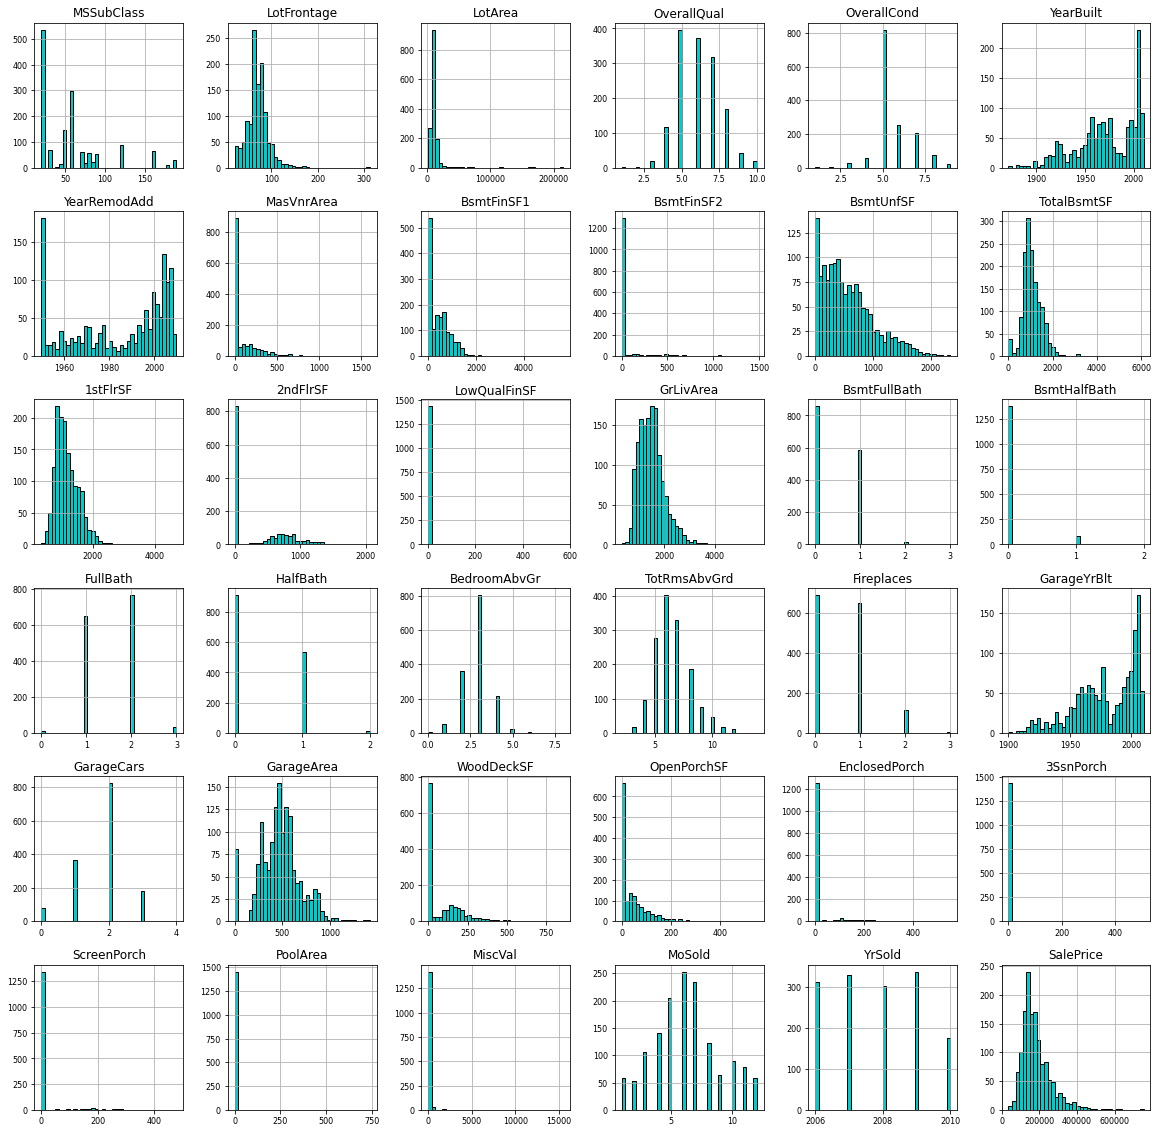

In [13]:
from math import sqrt

fig = numeric_df.hist(figsize=(20, 20), 
                bins=round(sqrt(len(numeric_df))), 
                color="#00CCCC", 
                edgecolor="#000000", 
                xlabelsize=8, 
                ylabelsize=8)

## Correlation

- Correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables.
- The values range between -1.0 and 1.0.
- A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement.

|Type|Value||
|:--|-:-|--:|
|Perfect Negative Correlation|-1|For a positive increase in one variable, there is a decrease in second variable|
|Perfect Positive Correlation|1|For a positive increase in one variable, there is an increase in second variable|
|No Correlation|0|No linear relationship between the variables|

<AxesSubplot:>

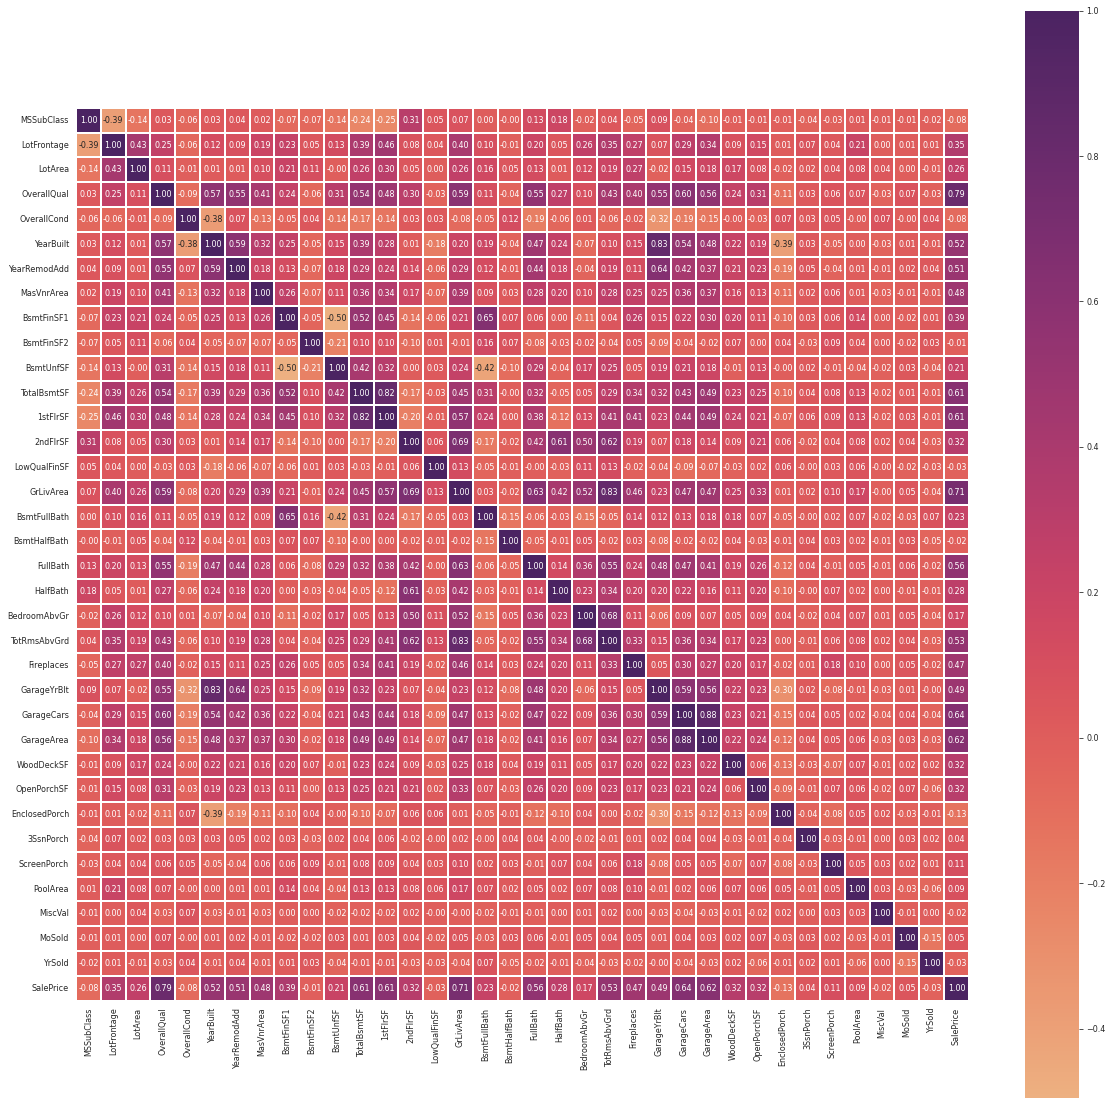

In [14]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 20)
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import seaborn as sns
sns.set_style('darkgrid')

numeric_correlation = numeric_df.corr()

sns.heatmap(numeric_correlation, cmap='flare', linewidths=0.1, square=True, annot=True, fmt=".2f")

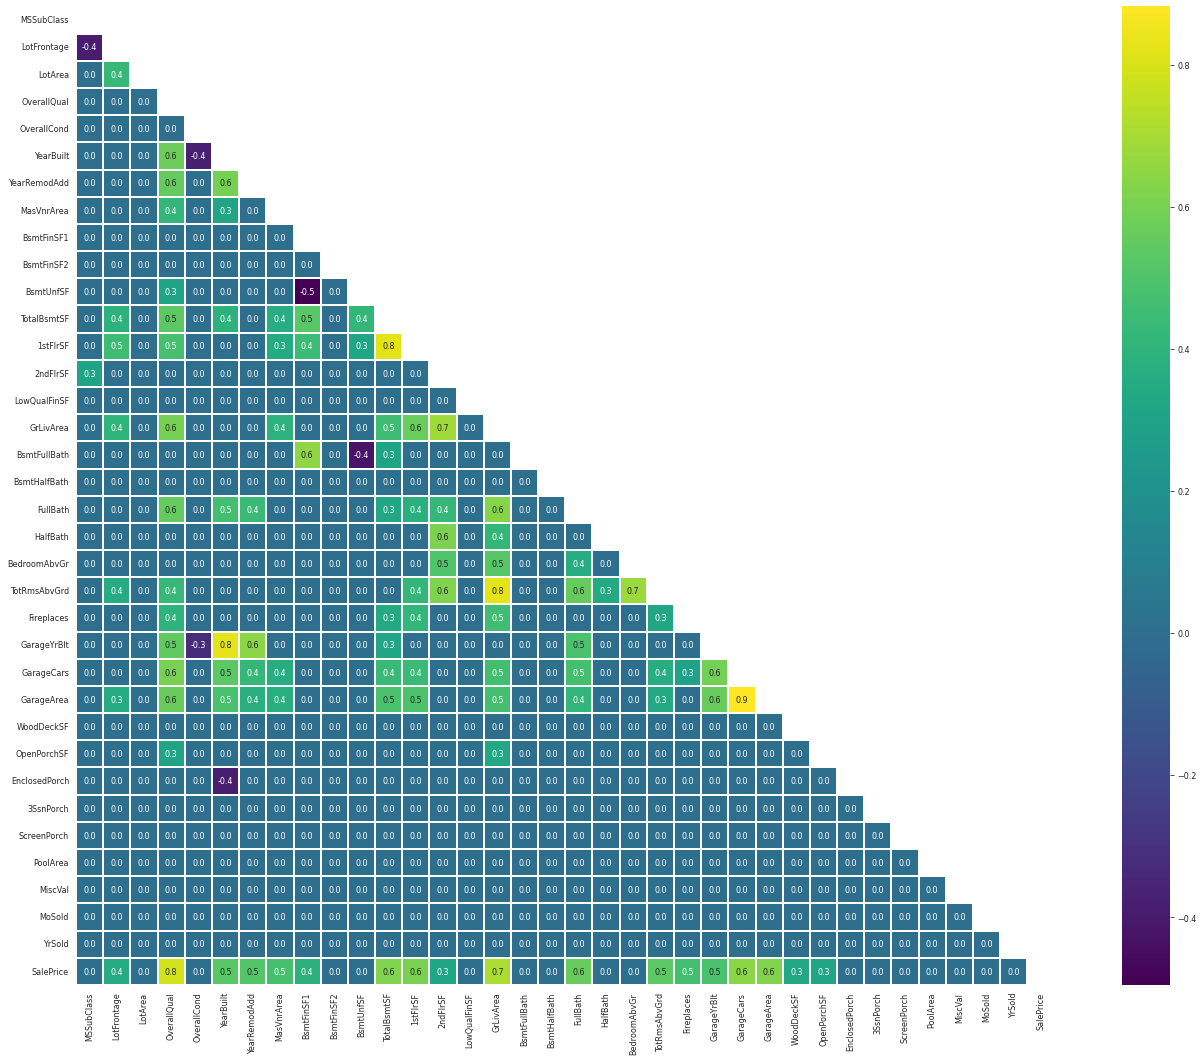

In [15]:
numeric_correlation[(numeric_correlation < 0.3) & (numeric_correlation > -0.3)] = 0

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(24, 18))
    mask = np.triu(np.ones_like(numeric_correlation, dtype=bool))
    ax = sns.heatmap(numeric_correlation, 
                     mask=mask, 
                     cmap='viridis', 
                     linewidths=0.1, 
                     square=True, 
                     annot=True, 
                     fmt=".1f")

### Correlation between Sale Price and other variables.

In [16]:
numeric_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
numeric_df_correlation = numeric_df.corr()['SalePrice'][:-1]

highly_correlated = numeric_df_correlation[abs(numeric_df_correlation) >= 0.5].sort_values(ascending=False)

print(f"Number of highly correlated features = {len(highly_correlated)}. \n The highly correlated features are :\n {highly_correlated}")

Number of highly correlated features = 10. 
 The highly correlated features are :
 OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [18]:
slightly_correlated = numeric_df_correlation[(abs(numeric_df_correlation) < 0.5) & (abs(numeric_df_correlation) >= 0.3)].sort_values(ascending=False)

print(f"Numer of slightly correlated features = {len(slightly_correlated)}. \n The slightly correlated features are : \n {slightly_correlated}")

Numer of slightly correlated features = 8. 
 The slightly correlated features are : 
 GarageYrBlt    0.486362
MasVnrArea     0.477493
Fireplaces     0.466929
BsmtFinSF1     0.386420
LotFrontage    0.351799
WoodDeckSF     0.324413
2ndFlrSF       0.319334
OpenPorchSF    0.315856
Name: SalePrice, dtype: float64


### Plot the relationship between two variables in a DataFrame

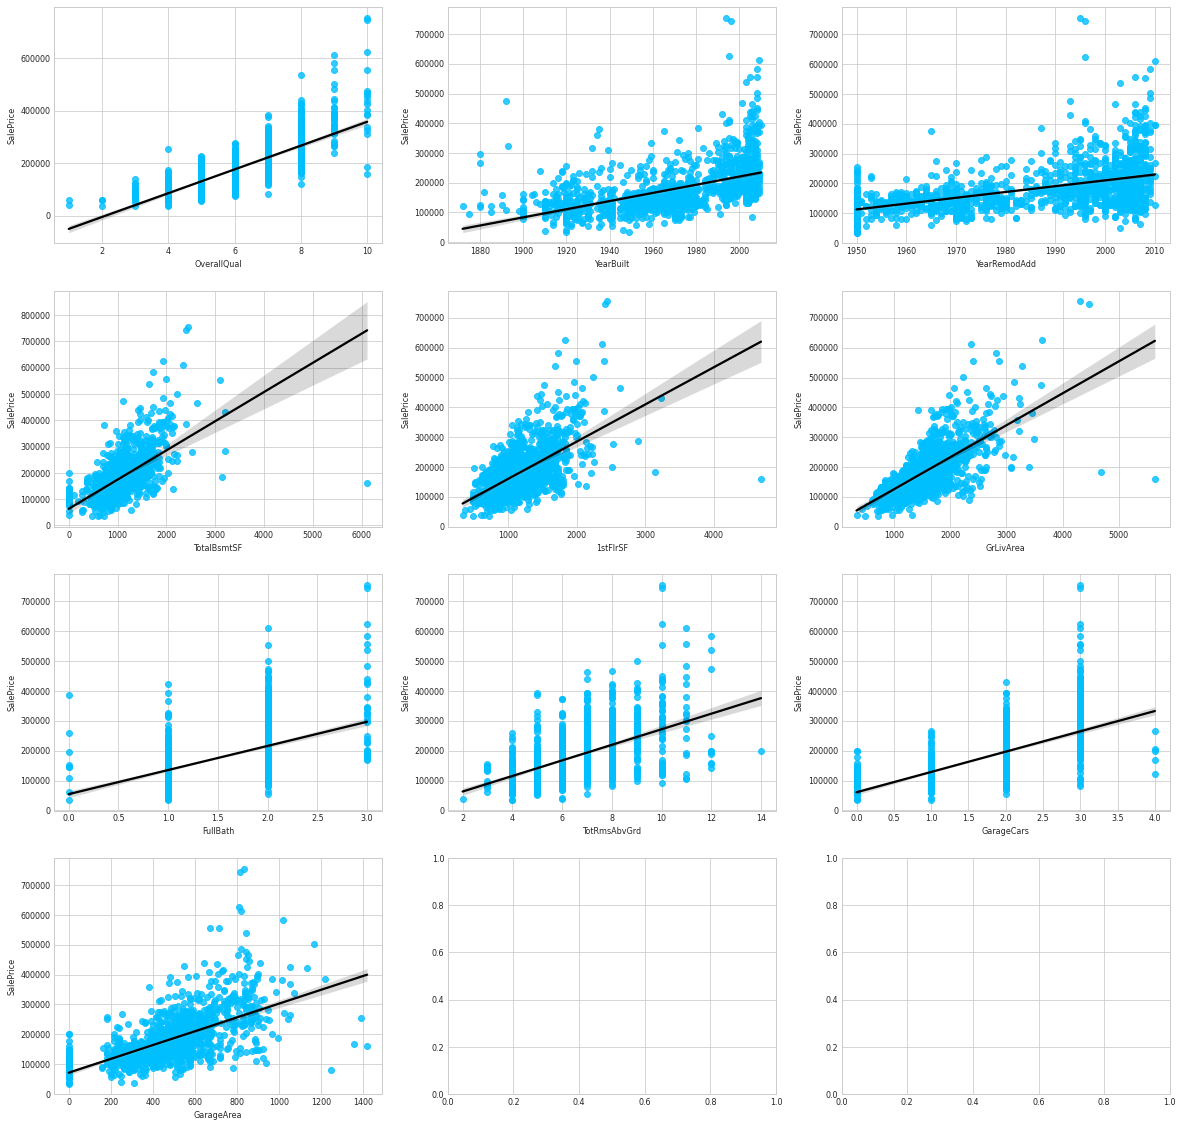

In [19]:
strng_corr_ftrs = numeric_df_correlation[abs(numeric_df_correlation) >= 0.5].index.tolist()
strng_corr_ftrs.append('SalePrice')

strong_features_df = numeric_df.loc[:, strng_corr_ftrs]

plt.style.use("seaborn-whitegrid")
fig, ax = plt.subplots(round(len(strng_corr_ftrs)/3), 3)

for i, ax in enumerate (fig.axes):
    if i < len(strng_corr_ftrs) - 1:
        sns.regplot(x=strng_corr_ftrs[i], 
                    y='SalePrice', 
                    data=strong_features_df, 
                    ax=ax, 
                    scatter_kws={"color": "deepskyblue"}, 
                    line_kws={"color": "black"})

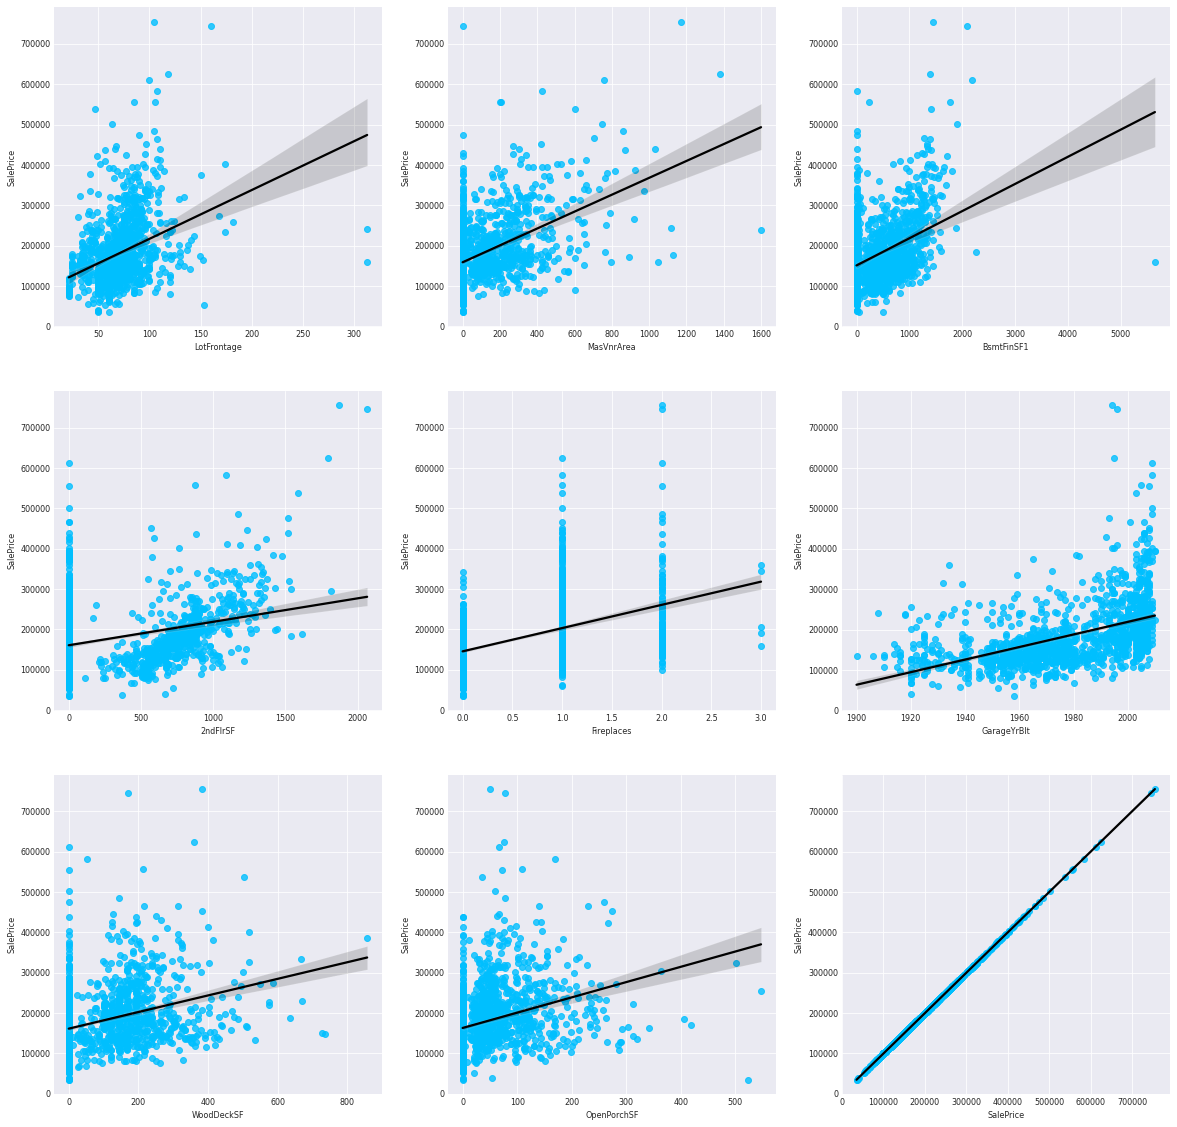

In [20]:
weak_corr_ftrs = numeric_df_correlation[(abs(numeric_df_correlation) >= 0.3) & (abs(numeric_df_correlation) < 0.5)].index.tolist()
weak_corr_ftrs.append('SalePrice')

weak_features_df = numeric_df.loc[:, weak_corr_ftrs]

plt.style.use("seaborn-darkgrid")
fig, ax = plt.subplots(round(len(weak_corr_ftrs)/3), 3)

for i, ax in enumerate(fig.axes):
    if i < len(weak_features_df) - 1:
        sns.regplot(x=weak_corr_ftrs[i], 
                    y='SalePrice', 
                    data=weak_features_df, 
                    ax=ax, 
                    scatter_kws={"color": "deepskyblue"}, 
                    line_kws={"color": "black"})

In [21]:
keep_features = strng_corr_ftrs[:-1] + weak_corr_ftrs

numeric_df = numeric_df.loc[:, keep_features]

numeric_df_test = df_test.loc[:, keep_features[:-1]]

## Check for Missing Values

In [22]:
cols_with_nan = numeric_df.columns[numeric_df.isnull().any()]
column_name = []
percent_nan = []

for col in cols_with_nan:
    column_name.append(col)
    percent_nan.append(round(numeric_df[col].isnull().sum()*100/len(numeric_df), 2))
    
table_nan = pd.DataFrame(column_name, columns=["Column"])
table_nan["%"] = percent_nan
table_nan.sort_values(by=["%"], ascending=False, inplace=True)

table_nan

,Column,%
0,LotFrontage,17.74
2,GarageYrBlt,5.55
1,MasVnrArea,0.55


Text(0, 0.5, 'Percentage of Missing Values(%)')

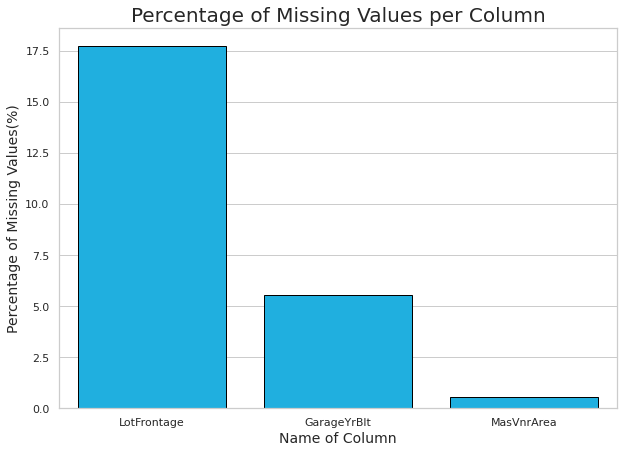

In [23]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

fig = sns.barplot(x="Column", 
                  y="%", 
                  data=table_nan,
                  edgecolor="black", 
                  color="deepskyblue")
fig.set_title("Percentage of Missing Values per Column", fontsize=20)
fig.set_xlabel("Name of Column", fontsize=14)
fig.set_ylabel("Percentage of Missing Values(%)", fontsize=14)

## Impute the missing values

In [24]:
from sklearn.impute import SimpleImputer
imp_val = SimpleImputer(strategy="median")

df_train_imputed = pd.DataFrame(imp_val.fit_transform(numeric_df))
df_train_imputed.columns = numeric_df.columns

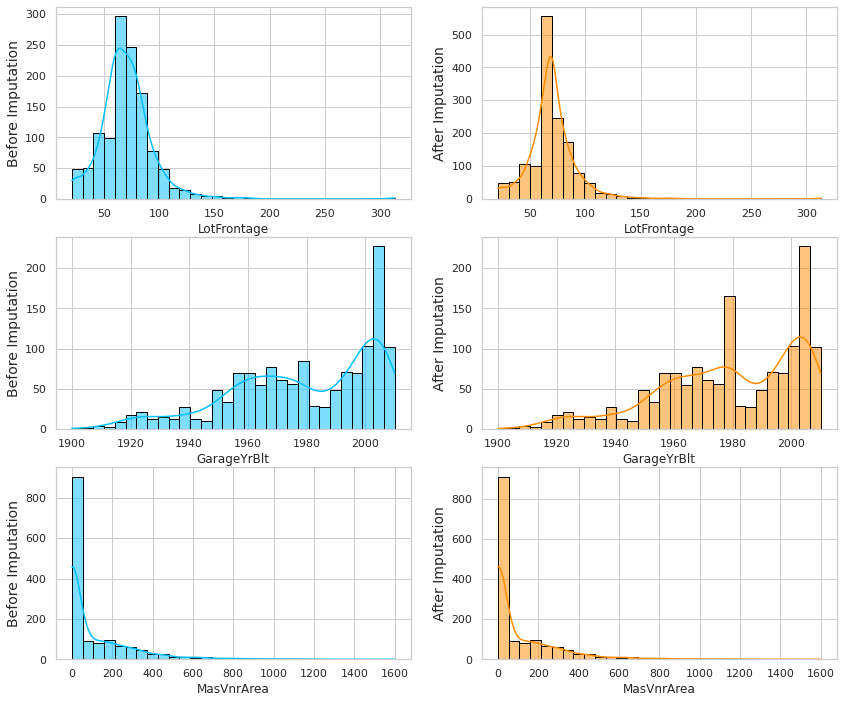

In [25]:
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")

fig, axes = plt.subplots(3, 2)
for feature, fig_pos in zip(["LotFrontage", "GarageYrBlt", "MasVnrArea"], [0, 1, 2]):
    p = sns.histplot(ax=axes[fig_pos, 0], 
                       x=numeric_df[feature], 
                       kde=True, 
                       bins=30, 
                       color="deepskyblue", 
                       edgecolor="black")
    p.set_ylabel(f"Before Imputation", fontsize=14)
    
    q = sns.histplot(ax=axes[fig_pos, 1], 
                     x=df_train_imputed[feature], 
                     kde=True, 
                     bins=30, 
                     color="darkorange", 
                     edgecolor="black")
    q.set_ylabel(f"After Imputation", fontsize=14)

- Distributions have changed for "LotFrontage" and "GarageYrBlt". 
- Distribution for "MasVnrArea" remains the same after imputation.
- To avoid error related to imputation, only keep "MasVnrArea" for further analysis.

In [26]:
df_train_imputed.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)
df_train_imputed.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,SalePrice
0,7.0,2003.0,2003.0,856.0,856.0,1710.0,2.0,8.0,2.0,548.0,196.0,706.0,854.0,0.0,0.0,61.0,208500.0
1,6.0,1976.0,1976.0,1262.0,1262.0,1262.0,2.0,6.0,2.0,460.0,0.0,978.0,0.0,1.0,298.0,0.0,181500.0
2,7.0,2001.0,2002.0,920.0,920.0,1786.0,2.0,6.0,2.0,608.0,162.0,486.0,866.0,1.0,0.0,42.0,223500.0
3,7.0,1915.0,1970.0,756.0,961.0,1717.0,1.0,7.0,3.0,642.0,0.0,216.0,756.0,1.0,0.0,35.0,140000.0
4,8.0,2000.0,2000.0,1145.0,1145.0,2198.0,2.0,9.0,3.0,836.0,350.0,655.0,1053.0,1.0,192.0,84.0,250000.0


## Performing the same operations on Test Set

In [27]:
numeric_df_test.drop(["LotFrontage", "GarageYrBlt"], axis=1, inplace=True)
numeric_df_test.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF
Id,,,,,,,,,,,,,,,,
1461,5,1961,1961,882.0,896,896,1,5,1.0,730.0,0.0,468.0,0,0,140,0
1462,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0,108.0,923.0,0,0,393,36
1463,5,1997,1998,928.0,928,1629,2,6,2.0,482.0,0.0,791.0,701,1,212,34
1464,6,1998,1998,926.0,926,1604,2,7,2.0,470.0,20.0,602.0,678,1,360,36
1465,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0,0.0,263.0,0,0,0,82


In [28]:
column_with_nan = numeric_df_test.columns[numeric_df_test.isnull().any()]
column_name = []
percent_nan = []

for col in column_with_nan:
    column_name.append(col)
    percent_nan.append(round(numeric_df_test[col].isnull().sum()*100/len(numeric_df_test), 2))

table = pd.DataFrame(column_name, columns=['Column'])
table["%"] = percent_nan
table.sort_values(by=['%'], ascending=False, inplace=True)

table

,Column,%
3,MasVnrArea,1.03
0,TotalBsmtSF,0.07
1,GarageCars,0.07
2,GarageArea,0.07
4,BsmtFinSF1,0.07


Text(0, 0.5, 'Percentage of Missing Values(%)')

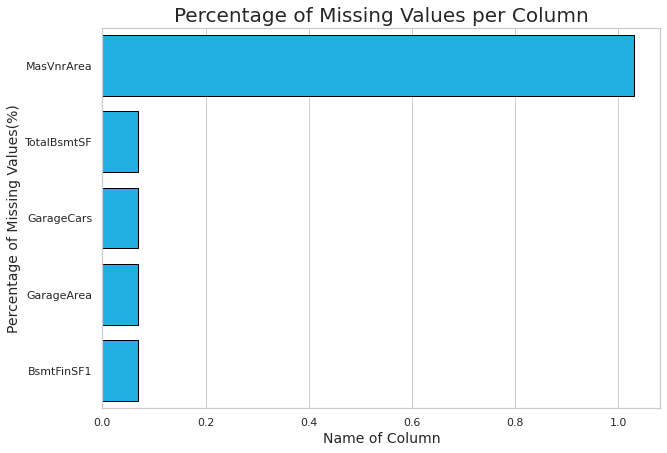

In [29]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style('whitegrid')

fig = sns.barplot(x="%", 
                  y="Column", 
                  data=table,
                  edgecolor="black", 
                  color="deepskyblue")
fig.set_title("Percentage of Missing Values per Column", fontsize=20)
fig.set_xlabel("Name of Column", fontsize=14)
fig.set_ylabel("Percentage of Missing Values(%)", fontsize=14)

In [30]:
impute_test_set = SimpleImputer(strategy='median')
df_test_imputed = pd.DataFrame(impute_test_set.fit_transform(numeric_df_test))
df_test_imputed.columns = numeric_df_test.columns

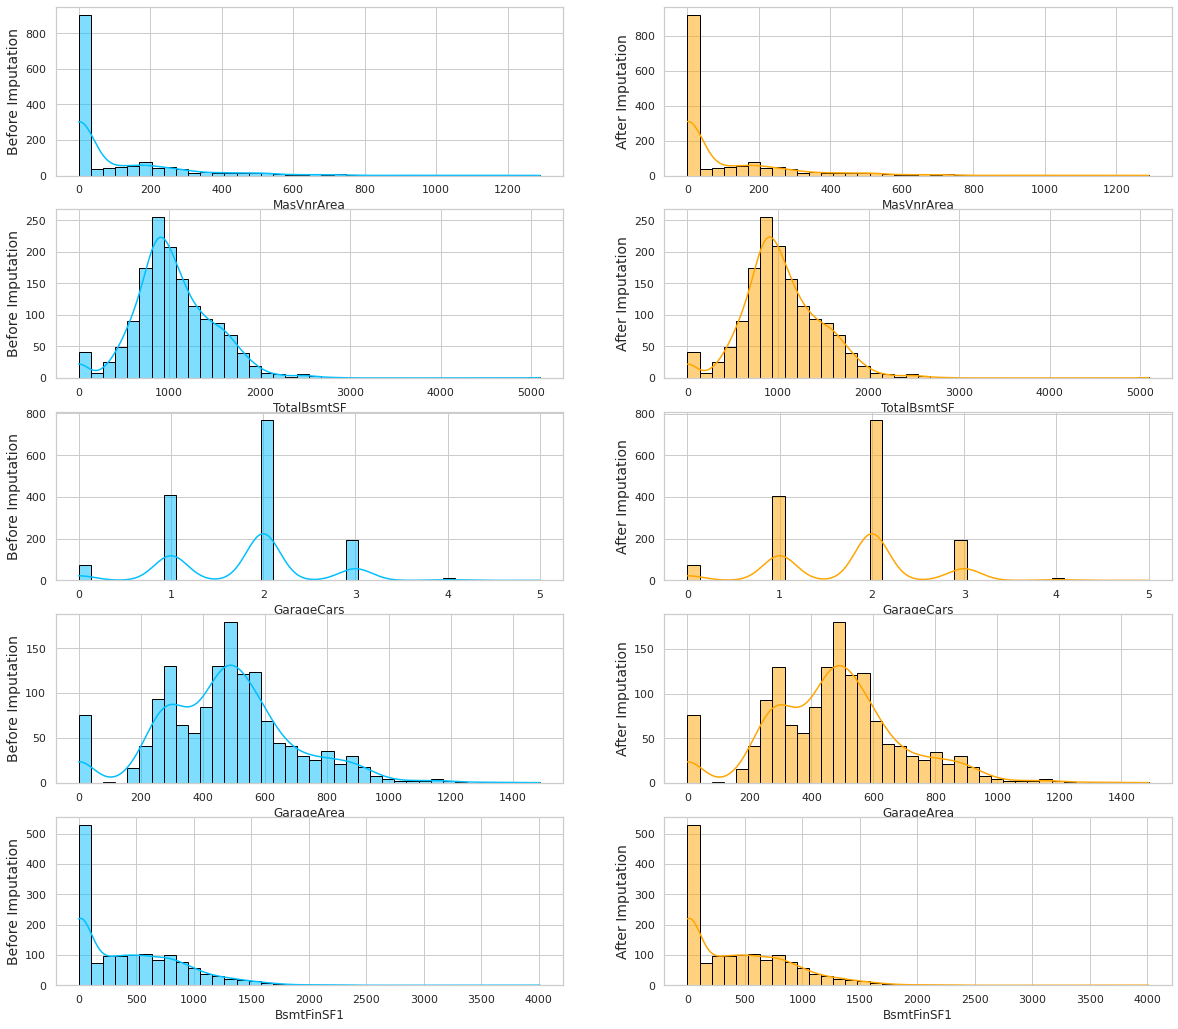

In [31]:
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2)

for feature, fig_pos in zip(table["Column"].tolist(), range(0, 6)):
    p = sns.histplot(x = numeric_df_test[feature], 
                     ax=axes[fig_pos, 0], 
                     kde=True, 
                     bins=round(sqrt(len(numeric_df_test))), 
                     color="deepskyblue", 
                     edgecolor="black")
    p.set_ylabel(f"Before Imputation", fontsize=14)
    
    q = sns.histplot(x=df_test_imputed[feature], 
                     ax=axes[fig_pos, 1], 
                     kde=True, 
                     bins=round(sqrt(len(df_test_imputed))), 
                     color="orange", 
                     edgecolor="black")
    q.set_ylabel(f"After Imputation", fontsize=14)

In [32]:
categorical_features = [col for col in df_train.columns if df_train[col].dtypes == "object"]
categorical_features.append("SalePrice")

category_df_train = df_train[categorical_features]

category_df_test = df_test[categorical_features[:-1]]

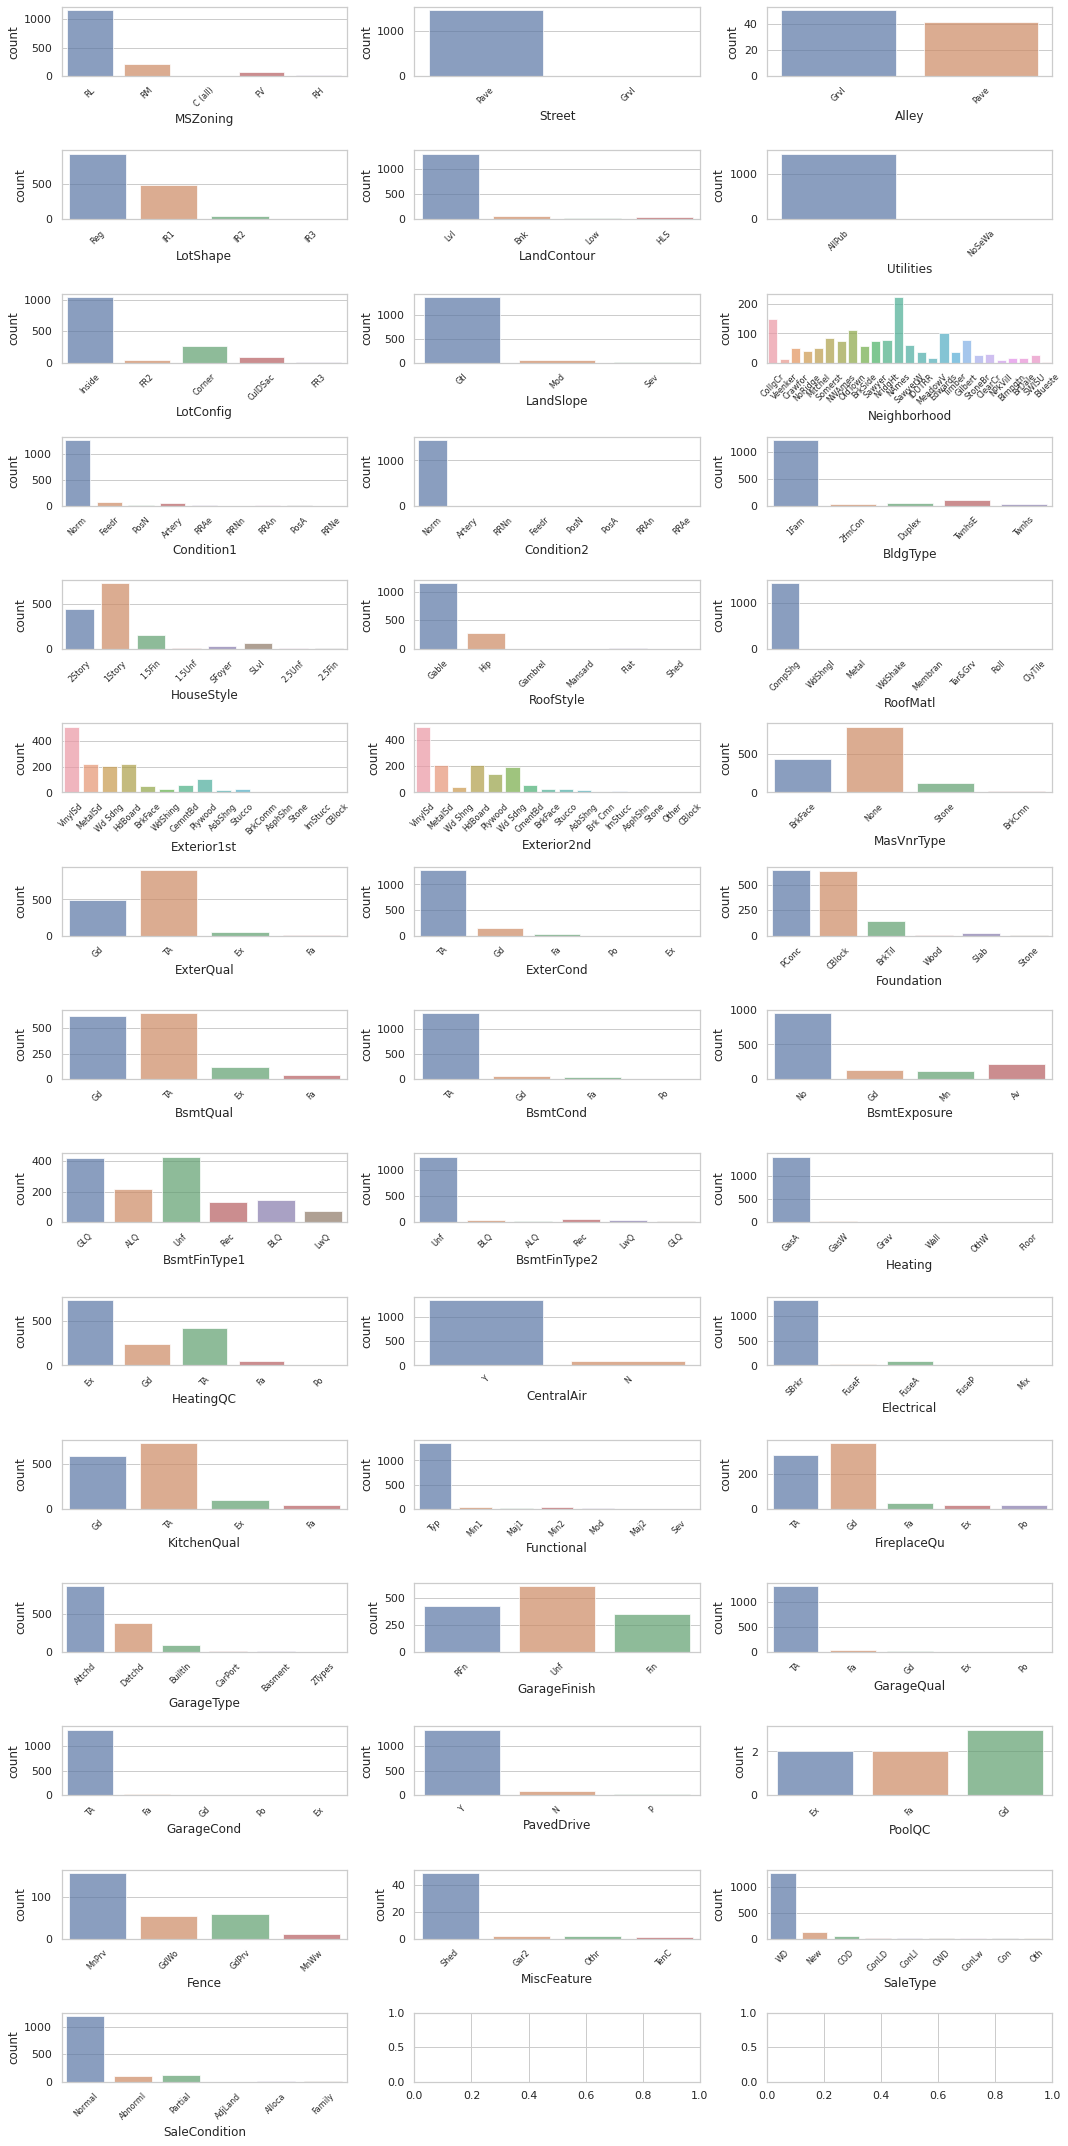

In [33]:
fig, axes = plt.subplots(round(len(category_df_train.columns)/3), 3, figsize=(15, 30))

for col, ax in enumerate(fig.axes):
    if col<len(category_df_train.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, fontsize=8)
        sns.countplot(data=category_df_train, 
                      x=category_df_train.columns[col], 
                      alpha=0.7, 
                      ax=ax)

fig.tight_layout()

- Some features have a higher level of class imbalance. Hence they are less informative and can be dropped.

In [34]:
columns_to_drop = ["Street","Alley","LandContour","Utilities","LandSlope","Condition2",
                   "RoofMatl","CentralAir","GarageQual","GarageCond","SaleType","PavedDrive",
                   "LandContour","ExterCond","GarageCond","Heating","MiscFeature","BsmtFinType2",
                   "Functional","GarageQual","GarageCond"]

category_df_train.drop(columns_to_drop, axis=1, inplace=True)
category_df_test.drop(columns_to_drop, axis=1, inplace=True)

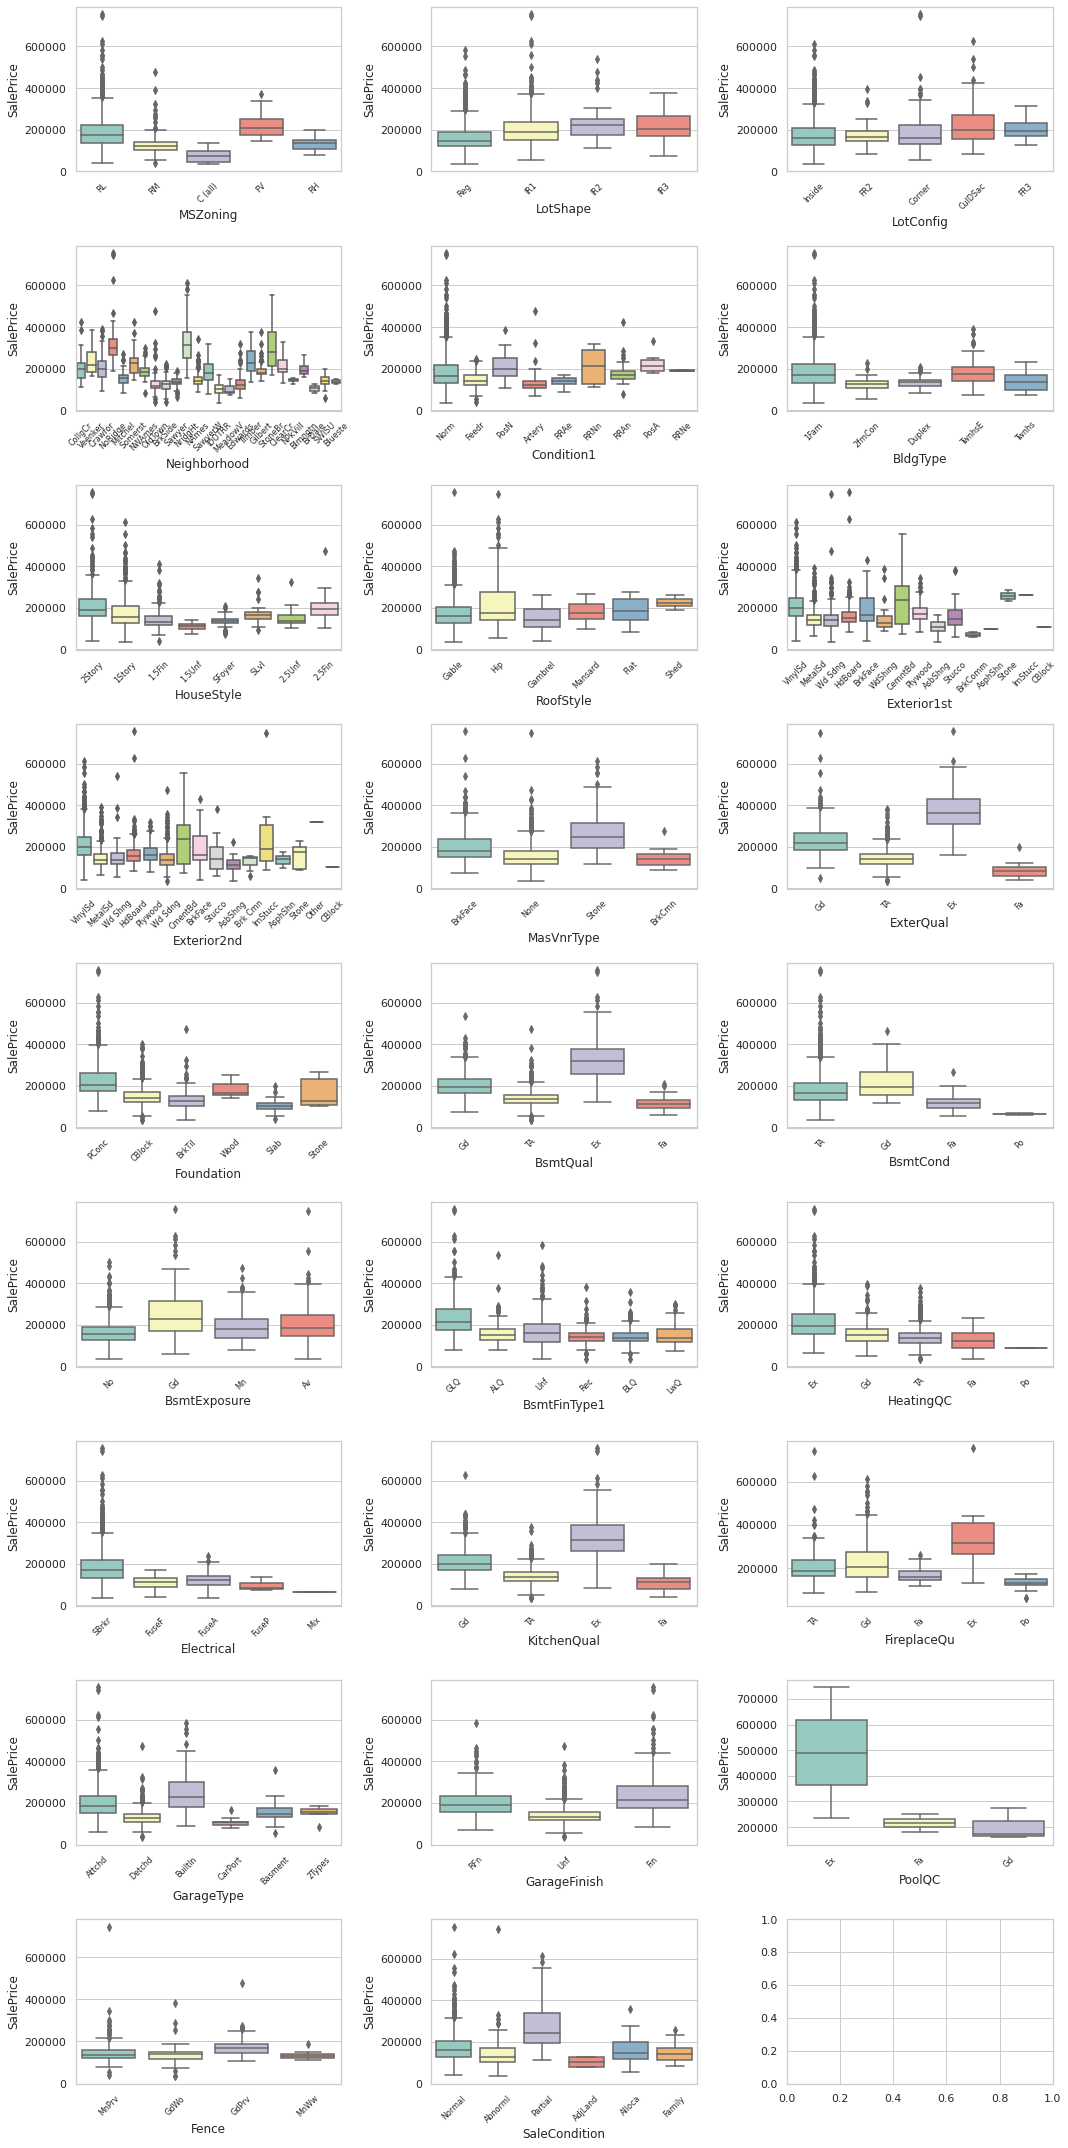

In [35]:
fig, axes = plt.subplots(round(len(category_df_train.columns)/3), 3, figsize=(15, 30))
for col, ax in enumerate(fig.axes):
    if col<len(category_df_train.columns) - 1:
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45, fontsize=8)
        sns.boxplot(data=category_df_train, 
                    x=category_df_train.columns[col], 
                    y="SalePrice", 
                    ax=ax, 
                    palette='Set3')

fig.tight_layout()

- There seems to be co-dependency between some variables. 
- Chi-square test can be used to measure the relationship between the variables and the direction.

In [36]:
category_df_train.columns

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'Electrical',
       'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC',
       'Fence', 'SaleCondition', 'SalePrice'],
      dtype='object')

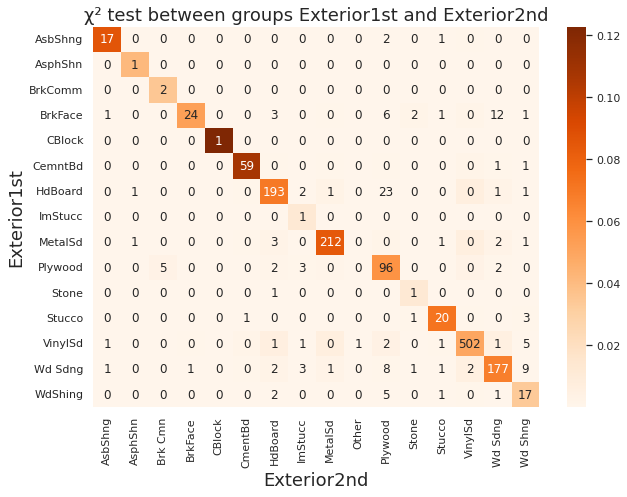

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0


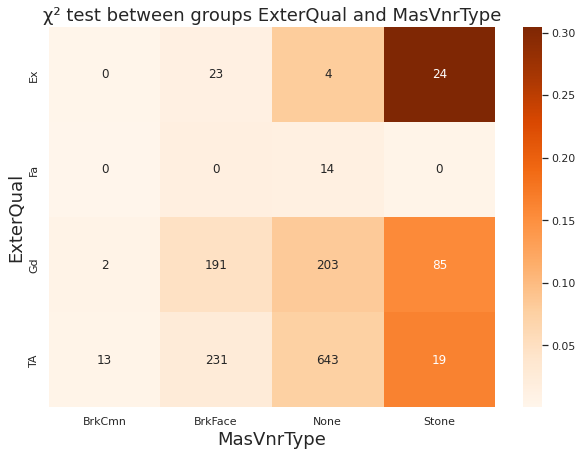

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.0187554679218715e-54


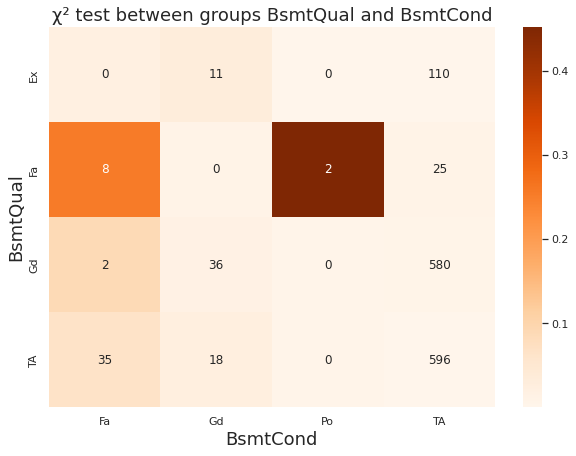

P-Value of the ChiSq Test bewteen BsmtQual and BsmtCond is: 1.9371809126533347e-31


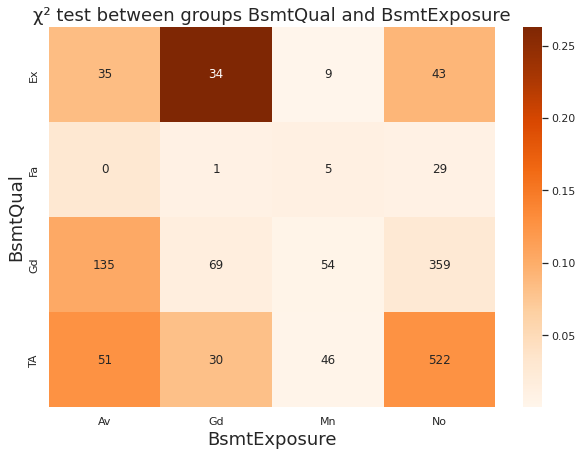

P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32


In [37]:
from scipy.stats import chi2_contingency

sns.set(rc={"figure.figsize": (10, 7)})

X = ['Exterior1st', 'ExterQual', 'BsmtQual', 'BsmtQual', 'BsmtQual']
Y = ['Exterior2nd', 'MasVnrType', 'BsmtCond', 'BsmtExposure']

for i, j in zip(X, Y):
    contigency_table = category_df_train[[i, j]].pivot_table(index=i, 
                                                             columns=j, 
                                                             aggfunc=len, 
                                                             margins=True, 
                                                             margins_name="Total")
    tx = contigency_table.loc[:, ["Total"]]
    ty = contigency_table.loc[["Total"], :]
    
    n = len(category_df_train)
    independence = tx.dot(ty) / n
    c = contigency_table.fillna(0)
    measure = (c - independence) ** 2 / independence
    xi_n = measure.sum().sum()
    table = measure / xi_n
    
    p = sns.heatmap(table.iloc[:-1, :-1], 
                annot=c.iloc[:-1, :-1], 
                fmt=".0f", 
                cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"χ² test between groups {i} and {j}", size=18)
    plt.show()
    
    crosstab_result = pd.crosstab(index=category_df_train[i], columns=category_df_train[j])
    ChiSquareResult = chi2_contingency(crosstab_result)
    print(f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSquareResult[1]}")

- p-value is significant for all tests.
- All the above variables can be dropped.

In [38]:
category_df_train.drop(Y, axis=1, inplace=True)
category_df_test.drop(Y, axis=1, inplace=True)

In [39]:
column_with_nan = category_df_train.columns[category_df_train.isnull().any()]
column_name = []
percent_nan = []

for col in column_with_nan:
    column_name.append(col)
    percent_nan.append(round((category_df_train[col].isnull().sum()*100)/len(category_df_train), 2))
    
table = pd.DataFrame(column_name, columns=["Column"])
table["%"] = percent_nan
table.sort_values(by="%", ascending=False, inplace=True)

table

,Column,%
6,PoolQC,99.52
7,Fence,80.75
3,FireplaceQu,47.26
4,GarageType,5.55
5,GarageFinish,5.55
0,BsmtQual,2.53
1,BsmtFinType1,2.53
2,Electrical,0.07


Text(0, 0.5, 'Percentage (%)')

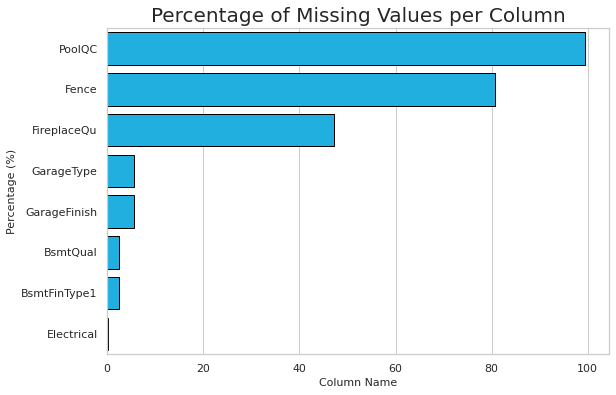

In [40]:
sns.set(rc={"figure.figsize": (9, 6)})
sns.set_style('whitegrid')

p = sns.barplot(data=table, x='%', y='Column', color="deepskyblue", edgecolor="black")
p.set_title("Percentage of Missing Values per Column", fontsize=20)
p.set_xlabel("Column Name", fontsize=11)
p.set_ylabel("Percentage (%)", fontsize=11)